In [1]:
import numpy as np
import pandas as pd
import time

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from pathlib import Path

#for dirname, _, filenames in os.walk('/kaggle/input'):
for dirname, _, filenames in os.walk("input"):
    print(dirname)

input
input\evaluation
input\test
input\training


In [2]:
#data_path = Path('/kaggle/input/abstraction-and-reasoning-challenge/')
data_path = Path('input/')
training_path = data_path / 'training'
evaluation_path = data_path / 'evaluation'
test_path = data_path / 'test'
training_tasks = sorted(os.listdir(training_path))
eval_tasks = sorted(os.listdir(evaluation_path))

In [3]:
#已解決的ID
solved_id=set()
solved_eva_id=set()

In [4]:
T = training_tasks
Trains = []
for i in range(400):
    task_file = str(training_path / T[i])
    task = json.load(open(task_file, 'r'))
    Trains.append(task)
    
E = eval_tasks
Evals= []
for i in range(400):
    task_file = str(evaluation_path / E[i])
    task = json.load(open(task_file, 'r'))
    Evals.append(task)

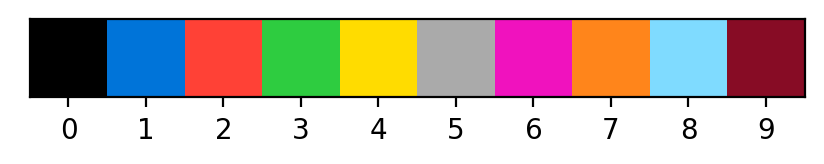

In [5]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=50)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    
    plt.tight_layout()
    plt.show()

In [6]:

def plot_picture(x):
    plt.imshow(np.array(x), cmap = cmap, norm = norm)
    plt.show()

In [7]:
def Defensive_Copy(A): 
    if type(A)!=list:
        A=A.tolist()
    n = len(A)
    k = len(A[0])
    L = np.zeros((n,k), dtype = int)
    for i in range(n):
        for j in range(k):
            L[i,j] = 0 + A[i][j]
    return L.tolist()

In [8]:
def Create(task, task_id = 0):
    n = len(task['train'])
    Input = [Defensive_Copy(task['train'][i]['input']) for i in range(n)]
    Output = [Defensive_Copy(task['train'][i]['output']) for i in range(n)]
    Input.append(Defensive_Copy(task['test'][task_id]['input']))
    return Input, Output

In [56]:
def getObjectHash(pixmap):
    flat = pixmap.flatten().astype(np.bool)
    mult = np.array([2 ** x for x in range(len(flat))])
    return np.sum(flat * mult)
#經測試沒有overflow問題
def groupByColor(pixmap):
    nb_colors = int(pixmap.max()) + 1
    splited = [(pixmap == i) * i for i in range(1, nb_colors)]
    return [x for x in splited if np.any(x)]
def checkColorMap(a0,b0):
    a=np.array(a0)
    b=np.array(b0)
    a[a==0]=10
    b[b==0]=10
    c = 1
    inp_hashes = sorted([getObjectHash(pm) for pm in groupByColor(a)])
    out_hashes = sorted([getObjectHash(pm) for pm in groupByColor(b)])
    c *= inp_hashes == out_hashes
    return bool(c)
def findColorMap(a,b):
    colormap = {}
    a1=np.array(a).flatten()
    b1=np.array(b).flatten()

    for col, idx in zip(*np.unique(a1,return_index=True)):
        if col in colormap.keys(): continue
        colormap[col] = b1[idx]
    return colormap

def mergedict(dict1):
    dict3={}
    for dict2 in dict1:
        for key in dict2.keys():
            if key not in dict3.keys():
                dict3[key]=dict2[key]
            elif dict3[key]!= dict2[key]:
                return False
    return dict3
def applyColorMap(pixmap, colormap):
    a1=np.array(pixmap)
    for i in range(a1.shape[0]):
        for j in range(a1.shape[1]):
            if a1[i][j] not in colormap: #
                continue #
            a1[i][j]=colormap[pixmap[i][j]]
    return a1.tolist()

In [85]:
def color_classes(a):
    b = len(np.nonzero(np.unique(a))[0])
    return b
#color classes (not include 0)
def take_negative(a0):
    a=np.array(a0)
    a_copy=a.copy()
    if color_classes(a)==2:
        if 0 in a:
            c1,c2=np.unique(a)[1],np.unique(a)[2]
        else:
            c1,c2=np.unique(a)[0],np.unique(a)[1]
        for i in range(len(a0)):
            for j in range(len(a0[0])):
                if a[i][j]==c1:
                    a_copy[i][j]=c2
                elif a[i][j]==c2:
                    a_copy[i][j]=c1

        return a_copy.tolist()
    else:
        return -1

In [86]:
a=Evals[21]["train"][0]["input"]

In [87]:
np.nonzero(np.unique(a))[0]

array([1, 2, 3, 4, 5], dtype=int64)

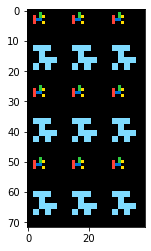

In [88]:
plot_picture(np.tile(np.array(a),(3,3)).tolist())

In [89]:
def solve_tile_by_shape(basic_task): 
    #returns -1 if no match is found

    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    colormaps={}

    for x, y in zip(Input,Output):
        m,n=len(x),len(x[0])
        pred_x=np.tile(np.array(x),(m,n)).tolist()
        if len(pred_x)!=len(y) or len(pred_x[0])!=len(y[0]):
            return -1
        if checkColorMap(pred_x,y)==False:
            return -1
        else:
            colormap=findColorMap(pred_x,y)
            colormaps=mergedict([colormap,colormaps])
            if colormaps==False:
                return -1
        

    m1,n1=len(Test_Case),len(Test_Case[0])
    return applyColorMap(np.tile(np.array(Test_Case),(m1,n1)).tolist(),colormaps)
        
        

311


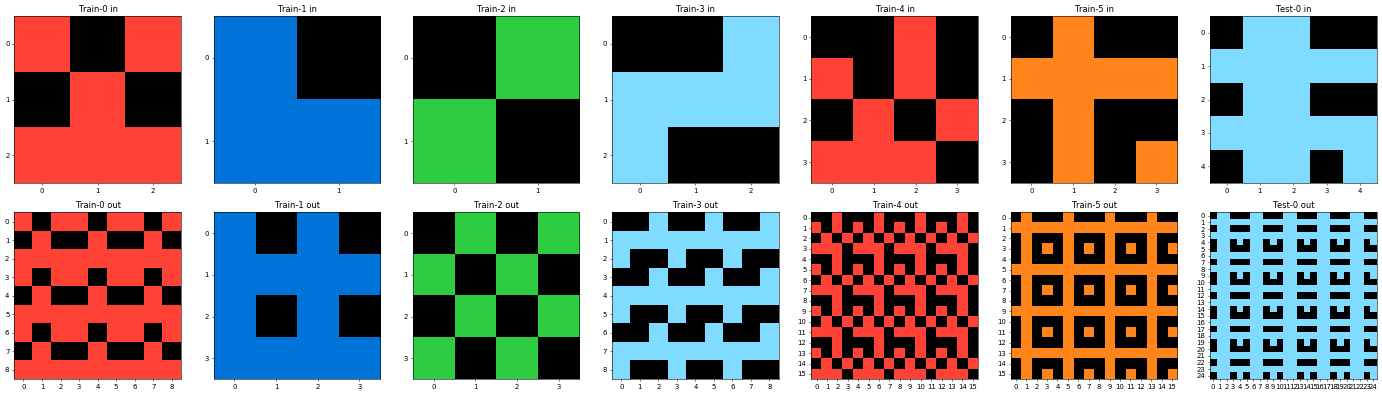

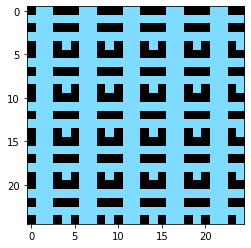

In [90]:
for i in range(400):
    task = Evals[i]
    basic_task = Create(task,0)
    a = solve_tile_by_shape(basic_task)

  
    if  a!=-1 :
        print(i)
        plot_task(task)
        plot_picture(a)
        solved_eva_id.add(i)

In [91]:
def solve_tile_by_shape_negative(basic_task): 
    #returns -1 if no match is found

    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    colormaps={}

    for x0, y in zip(Input,Output):
        x=take_negative(x0)
        if x ==-1:
            return -1
        m,n=len(x),len(x[0])
        pred_x=np.tile(np.array(x),(m,n)).tolist()
        if len(pred_x)!=len(y) or len(pred_x[0])!=len(y[0]):
            return -1
        if checkColorMap(pred_x,y)==False:
            return -1
        else:
            colormap=findColorMap(pred_x,y)
            colormaps=mergedict([colormap,colormaps])
            if colormaps==False:
                return -1
        

    m1,n1=len(Test_Case),len(Test_Case[0])
    Test_Case_negative=take_negative(Test_Case)
    if Test_Case_negative==-1:
        return -1
    return applyColorMap(np.tile(np.array(Test_Case_negative),(m1,n1)).tolist(),colormaps)
        

In [94]:
for i in range(400):
    task = Evals[i]
    basic_task = Create(task,0)
    a = solve_tile_by_shape_negative(basic_task)

  
    if  a!=-1 :
        print(i)
        plot_task(task)
        plot_picture(a)
        solved_eva_id.add(i)

In [79]:
def solve_tile_by_color_uniqe(basic_task): 
    #returns -1 if no match is found

    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    colormaps={}
    colormapsb={}
    colormapsc={}
    a=True
    b=True
    c=True
    
    for x, y in zip(Input,Output):
        x_unique=len(np.nonzero(np.unique(x))[0])
        pred_1=np.tile(np.array(x),(x_unique,x_unique)).tolist()
        if len(pred_1)!=len(y) or len(pred_1[0])!=len(y[0]):
            a=False
        if a==True:
            if checkColorMap(pred_1,y)==False:
                a=False
            else:
                colormap=findColorMap(pred_1,y)
                colormaps=mergedict([colormap,colormaps])
                if colormaps==False:
                    a=False

        pred_2=np.tile(np.array(x),(1,x_unique)).tolist()
        if len(pred_2)!=len(y) or len(pred_2[0])!=len(y[0]):
            b=False
        if b==True:
            if checkColorMap(pred_2,y)==False:
                b=False
            else:
                colormap=findColorMap(pred_2,y)
                colormapsb=mergedict([colormap,colormapsb])
                if colormapsb==False:
                    b=False
        pred_3=np.tile(np.array(x),(x_unique,1)).tolist()
        if len(pred_3)!=len(y) or len(pred_3[0])!=len(y[0]):
            c=False
        if c==True:
            if checkColorMap(pred_3,y)==False:
                c=False
            else:
                colormap=findColorMap(pred_3,y)
                colormapsc=mergedict([colormap,colormapsc])
                if colormapsc==False:
                    c=False
    if a==False and b==False and c==False:
        return -1
    Test_Case_unique=len(np.nonzero(np.unique(Test_Case))[0])
    if a==True:
        return applyColorMap(np.tile(np.array(Test_Case),(Test_Case_unique,Test_Case_unique)).tolist(),colormaps)
    elif b==True:
        return applyColorMap(np.tile(np.array(Test_Case),(1,Test_Case_unique)).tolist(),colormapsb)
    else:
        return applyColorMap(np.tile(np.array(Test_Case),(Test_Case_unique,1)).tolist(),colormapsc)

251


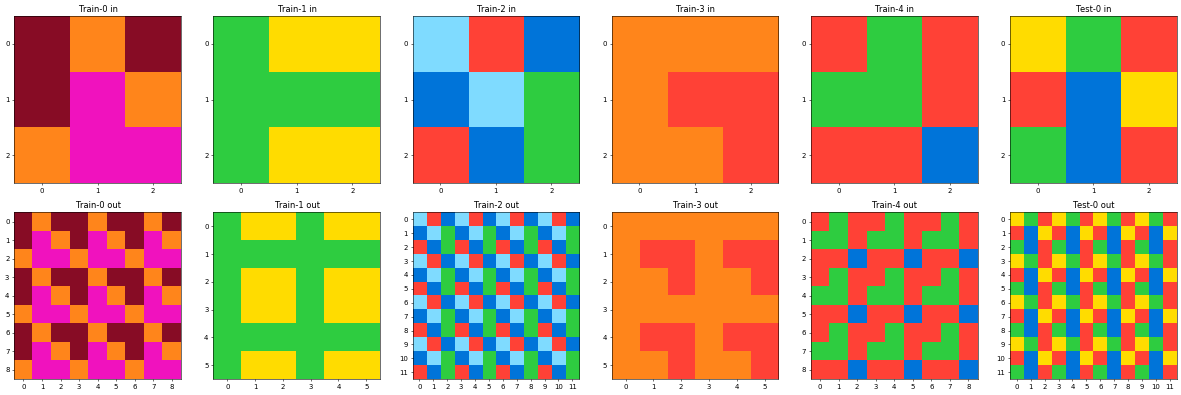

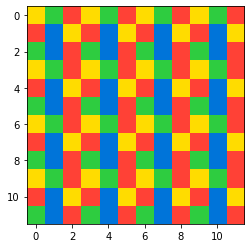

In [80]:
for i in range(400):
    task = Evals[i]
    basic_task = Create(task,0)
    a = solve_tile_by_color_uniqe(basic_task)

  
    if  a!=-1 :
        print(i)
        plot_task(task)
        plot_picture(a)
        solved_eva_id.add(i)